<a href="https://colab.research.google.com/github/dansarmiento/ColaboratoryNotebooks/blob/main/UnifiedHRdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import datetime

In [2]:
# https://docs.google.com/spreadsheets/d/1Dt2_0qi_qQnU_L4xvoHr_KUf-eTncjFnNwTDeVyieGg/edit?usp=sharing
df1_sheet_id = "1Dt2_0qi_qQnU_L4xvoHr_KUf-eTncjFnNwTDeVyieGg"
df1_sheet_name = "Sheet1"

running_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(df1_sheet_id,df1_sheet_name)
df1 = pd.read_csv(running_url)
#https://docs.google.com/spreadsheets/d/180hlbBRpd45AqzZSA_Y4os8mMiPdaO6T9VzBiezNtTw/edit
#sheet = Workout
df3_sheet_id = '180hlbBRpd45AqzZSA_Y4os8mMiPdaO6T9VzBiezNtTw'
df3_sheet_name = 'Workout'
df3_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(df3_sheet_id,df3_sheet_name)
df3 = pd.read_csv(df3_url)

#https://docs.google.com/spreadsheets/d/1-T4oKa94_olMl8IeklLH-uqy0r4d2i7QObQ8FHZbW94/edit
#sheet = BurpeeData
df2_sheet_id = '1-T4oKa94_olMl8IeklLH-uqy0r4d2i7QObQ8FHZbW94'
df2_sheet_name = 'BurpeeData'
df2_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(df2_sheet_id,df2_sheet_name)
df2 = pd.read_csv(df2_url)

In [3]:
df1.head()
# clean up the data in df1 starting with the datetime, converting from object to datetime
df1.Datetime = pd.to_datetime(df1['Datetime'])


In [4]:
df1.set_index(df1['Datetime'], drop=True, inplace=True)
# set up the index and attempted to drop the column, but it didn't work

In [5]:
#df1.Datetime.dt.year.astype(str) + '_' + df1.Datetime.strftime('%m').astype(str)
# next is to take a slice of columns from Zone 1 to Zone 5
#df1 = df1[['Zone 1','Zone 2','Zone 3','Zone 4','Zone 5']]
#df1.Datetime.dt.year.astype(str) + '_' + df1.index.strftime('%m').astype(str)

In [6]:
df1_zt = df1[['Datetime','Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5']]

In [7]:
df2.head()
df2.BurpeeDTM = pd.to_datetime(df2['BurpeeDTM'])

In [8]:
df2.set_index(df2['BurpeeDTM'], drop=True, inplace=True)

In [9]:
df2.head()
df2_zt = df2[['BurpeeDTM','Z1P','Z2P','Z3P','Z4P','Z5P']]

In [10]:
df1_zt.columns = df1_zt.columns.str.replace(' ','_')

In [11]:
df2_zt.columns = ['Datetime', 'Zone_1', 'Zone_2', 'Zone_3', 'Zone_4', 'Zone_5']

In [12]:
df3.head()
df3.WorkoutDTM = pd.to_datetime(df3['WorkoutDTM'])

In [13]:
df3.set_index(df3['WorkoutDTM'], inplace=True)

In [14]:
df3.head()
df3_zt = df3[['WorkoutDTM','Z1mins','Z2mins','Z3mins','Z4mins','Z5mins']]

In [15]:
df3_zt.columns = ['Datetime', 'Zone_1', 'Zone_2', 'Zone_3', 'Zone_4', 'Zone_5']

In [16]:
df = pd.concat([df1_zt, df2_zt, df3_zt])

In [17]:
df['year_month'] = df.Datetime.dt.year.astype(str) + '_' + df.Datetime.dt.strftime('%m')

In [18]:
df.head()
df.drop(columns='Datetime', inplace=True)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

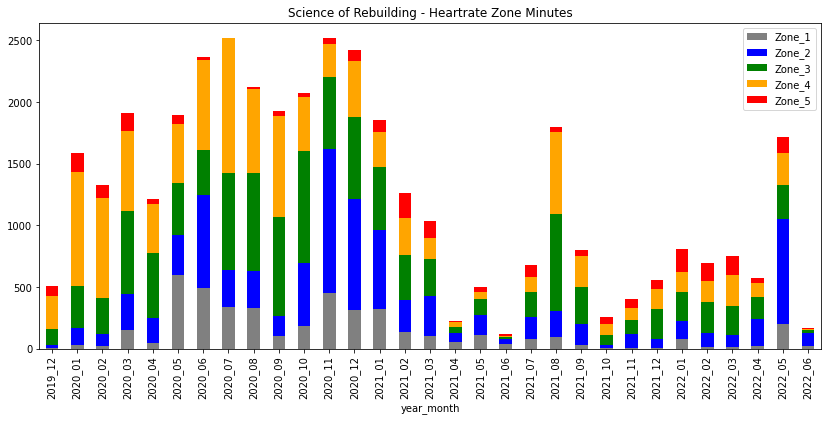

In [21]:
df.groupby(by='year_month').sum().plot(kind='bar', stacked=True, color=['gray','blue','green','orange','red'],
                                       figsize=(14,6), title='Science of Rebuilding - Heartrate Zone Minutes')

In [22]:
import plotly.express as px

In [25]:
df.head()
df_melt = pd.melt(df.reset_index(), id_vars=['index', 'year_month'], var_name='ZoneType',value_name='ZoneMins')

In [26]:
fig = px.bar(df_melt, x='year_month', y='ZoneMins', color='ZoneType', 
             title='Science of Rebuilding - Monthly Heartrate Zone Minutes', 
             color_discrete_map={'Zone_1':'gray','Zone_2':'blue','Zone_3':'green','Zone_4':'orange','Zone_5':'red'})
fig.show()